## Modélisation de la survie d'un individu dans un milieu hostile.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
from matplotlib import colors

# Fonctions Humain

La fonction suivante renvoie les jours restants avant la construction de l'abri, si l'abri est construit, si l'agent est secouru(e) en trouvant un village, s'il possède une source infini. 

In [29]:
def construction_abri(cap , source_inf , vegr , veg , s , jourres , abri):
    """float*bool*int*float*int*bool => bool*int*bool*bool"""
    #sauve:bool
    sauve = False
    #rand:float
    if jourres != 0:
        jourres = jourres - 1
    else:
        abri = True
    if jourres == -11 or vegr == 0:
        jourres = ((45/(cap*0.5)//10 * 1/(veg/5)))/1.
        abri = False
        source_inf = False
        rand = np.random.random_sample()
        if rand < s:
            sauve = True
    jourres = jourres//1

    return jourres , abri , sauve , source_inf

In [30]:
construction_abri(0.1,False,1,20,0.1,-10,False)

(22.0, False, False, False)

Renvoie l'hydratation de l'agent après qu'il soit allé chercher de l'eau 

In [31]:
def trouver_eau(p_eau , capadap , source_inf , hydrat):
    """float*float*bool*float => bool*float"""
    b=0
    if source_inf == 1:
        hydrat = 1
    else:
        rand = np.random.random_sample()
        if rand <= 0.4*p_eau*(2.5*capadap):
            hydrat = hydrat + 0.25
        elif rand <= p_eau*(5*capadap) :
            hydrat = hydrat + 0.5
            rand=np.random.random_sample()
            if rand > 0.4: 
                source_inf = True
    if hydrat > 1:
        hydrat = 1
    return source_inf , hydrat

La fonction suivante renvoie la santé de l'agent après qu'il soit allé chercher des vegetaux et le nombre de vegetaux restants

In [32]:
 def inter_veget(veg,alimentation,capadap,vegre):
    """int*float*float=>int*float"""
    #p_vg:float
    p_vg=0.6
    #trouve:bool
    trouve=True
    #vegr:int
    vegr=vegre
    if vegr == 0:
        vegr = veg
    while vegr>0 and trouve==True:
        rand=np.random.random_sample()
        if rand * capadap < p_vg:
            alimentation = alimentation + (0.08 * capadap)
            vegr = vegr - 1
            p_vg = p_vg-0.1
        else:
            trouve=False
    if alimentation > 1:
        alimentation = 1
    return alimentation , vegr

La fonction suivante renvoie l'alimentation de l'agent apres son interaction possible avec des animaux non dangereux

In [33]:

def inter_anim(p_a, p_ap, force, capadap, alimentation, sante,c):
    """
    float ^6 -> float ^2
    hyp : 
    """
    
    
    random1=np.random.random_sample()
    if random1 <= p_a : 
        random2 = np.random.random_sample()
        if random2 <= p_ap :
            alimentation,sante = inter_pred(force, capadap, alimentation, sante)
        else :
            alimentation = alimentation + 0.15
    if alimentation > 1:
        alimentation = 1.0
    
    if sante <= 0:
        sante = 0
        c = "Mort mangé par un prédateur"
        
    return alimentation , sante , c

In [34]:
 def inter_pred(force, cap, alimentation, sante):
    """
    float * float * float * float -> float * float 
    hyp : random2 <= p_a
    rend le niveau d alimentation et de sante apres une rencontre avec un animal dangereux 
    """

    random4=np.random.random_sample()
    combat = random4*(force+0.5)*(cap+0.5)
    if combat <= 0.1 :
        sante = 0 
    elif combat <=0.4 :
        sante = sante - (1-force)*(1-cap)*0.5
    elif combat <= 0.7 : 
        sante =sante - (1-force)*(1-cap)*0.4
        alimentation = alimentation + 0.15 
    else :
        alimentation = alimentation + 0.15
    return alimentation, sante  

In [35]:
def sante_fct_hydr_alim(alimentation,hydratation,sante,abri,force,c):
    """float³=>float
    force en fonction de l'alimentation et hydratation"""
    
    if abri==True:
        sante=sante+0.025
    
    if alimentation >= 0.7 and hydratation >=0.7:
        if sante<0.2:
            sante = 0.2
        else:
            sante = sante + 0.05
    elif alimentation>=0.5 and hydratation >=0.5:
        alimentation=alimentation
    elif alimentation<0.5 :
        if hydratation<0.5:
            sante = sante - ((0.5-alimentation)*0.7 + (0.5-hydratation)*0.9)
        else:
            sante = sante - (0.5-alimentation)*0.5
    else:
        sante = sante - (0.6-hydratation)
    if sante <=0:
        sante=0
        c="Mort d'épuisement"
    if sante > 1.0 :
        sante = 1.0
    
    if sante >=0.3 and force<=1.0:
        force=force+0.01
    elif force>=0.1:
        force=force-0.05
    
    
    hydratation=hydratation-0.3
    alimentation=alimentation-0.15
    if hydratation <= 0:
        hydratation =0
        c = "Mort de déshydratation"
        sante = 0
    if alimentation <= 0:
        alimentation = 0
        c = "Mort de faim"
        sante = 0
    return sante,alimentation,hydratation,force,c

Detetermine retourne si l agent est secouru par une equipe de secours

In [36]:
def secouru(p_s, j,p_s_ini,p_s_10):
    """
    float * int -> bool 
    hyp :
    retourne si l agent est secouru par une equipe de secours
    """


    #secouru : bool
    secouru = False

    if j <= 10 :
        p_s = p_s + p_s_ini*0.2
    elif j <= 25 :
        p_s_10 = p_s
    else :
        p_s = p_s - p_s_10*0.2
    
    random5=np.random.random_sample()
    secouru = random5 <= p_s

    return secouru , p_s


In [37]:
secouru(0.008666657999999999,0,0.00666666,0)

(False, 0.009999989999999999)

In [38]:
def model(jour,Lsante):
    """int*list[float]"""
    Ljour=[]
    for i in range(0,jour):
        Ljour.append(i+1)
    plt.bar(Ljour,Lsante , color='green' )
   

## FONCTIONS PREDATEUR

Retourne le niveau d'alimentation et d'hydratation du predateur

In [39]:
def nourriture_p(p_a, alimentation_p, p_e, hydrat_p):
    """
    float^4 -> float^2
    retourne le niveau d alimentation et d hydratation du predateur
    """
    
    rand = np.random.random_sample()
    if rand <= 1.5*p_a:
        alimentation_p = alimentation_p + 0.15
    if alimentation_p >1 :
        alimentation_p = 1
    if rand <= 1.3*p_e:
        hydrat_p = hydrat_p + 0.4
    if hydrat_p > 1:
        hydrat_p = 1
    return alimentation_p,hydrat_p

Retourne le niveau d alimentation du predateur jour apres jour

In [40]:
def ev_nourriture_p(alimentation_p, hydrat_p):
    """
    float^2 -> float^2
    retourne le niveau d alimentation du predateur jour apres jour
    """
    alimentation_p = alimentation_p - 0.1
    hydrat_p = hydrat_p - 0.3
    return alimentation_p, hydrat_p

Retourne si le predateur meurt de faim ou deshydratation

In [41]:
def mort_p_nourriture(alimentation_p, hydrat_p):
    """
    float^2 -> bool
    retourne si le predateur meurt de faim ou deshydratation
    """
    if alimentation_p <= 0 or hydrat_p <=0 :
        return True
    else :
        return False

Rend le niveau d alimentation et de sante apres une rencontre avec un animal dangereux 

In [42]:
def inter_pred(force, cap, alimentation, sante):
    """
    float * float * float * float -> float * float 
    hyp : random2 <= p_a
    rend le niveau d alimentation et de sante apres une rencontre avec un animal dangereux 
    """

    random4=np.random.random_sample()
    combat = random4*(force+0.5)*(cap+0.5)
    if combat <= 0.1 :
        sante = 0 
    elif combat <=0.4 :
        sante = sante - (1-force)*(1-cap)*0.5
    elif combat <= 0.7 : 
        sante =sante - (1-force)*(1-cap)*0.4
        alimentation = alimentation + 0.15 
    else :
        alimentation = alimentation + 0.15
    return alimentation, sante

Retourne l'issue du combat entre le predateur et l'humain

In [43]:
def combat_p_h(force,cap,dang_p):
    """
    float^4 -> float * bool
    retourne l'issue du combat entre le predateur et l'humain
    """
    mort=False
    rand = np.random.random_sample()
    res = rand*(dang_p+0.45)*(cap-1.65)*(force-1.65)
        
    
    return res

Retourne le niveau de sante et d alimentation en fonction de l'issue du combat, et la cause de la mort si l agent humain meurt

In [44]:
def sante_apres_combat(res,alimentation,sante,alimentation_p,sante_p):
    """
    float ^5 -> float ^4 * str
    retourne le niveau de sante et d alimentation en fonction de l'issue du combat, 
    et la cause de la mort si l agent humain meurt
    """
    #c : str
    c=""
    if res < 0.16 :
        alimentation = alimentation + 0.15
        sante_p = 0
        c = "le prédateur est tué par l'humain"
    elif res < 0.33 :
        alimentation = alimentation + 0.15
        sante = sante - res
        sante_p = 0
        c = " le prédateur est tué par l'humain"
    elif res < 0.5 :
        sante_p = sante_p - (1 - res)
    elif res < 0.66 :
        sante = sante - res
        sante_p = sante_p - (1 - res)
    elif res < 0.8 :
        sante = 0
        sante_p = sante_p - (1 - res)
        c = "l'humain est tué par le prédateur"
    else :
        sante = 0
        c = "l'humain est tué par le prédateur"
    return alimentation, sante, alimentation_p, sante_p , c 
    

Retourne la sante du prédateur en fonction de son alimentation et hydratation

In [45]:
def sante_fct_hydr_alim_p(alimentation_p, hydrat_p, sante_p):
    """
    float ^3 -> float
    retourne la sante du prédateur en fonction de son alimentation et hydratation
    """
    
    if alimentation_p >= 0.5 and hydrat_p >=0.5:
        if sante_p<0.3:
              sante_p = 0.3
        else:
              sante_p = sante_p + 0.1
    elif alimentation_p < 0.5 :
        if hydrat_p < 0.5:
            sante_p = sante_p - ((0.5-alimentation_p)*0.5 + (0.5-hydrat_p)*0.8)
        else:
            sante_p = sante_p - (0.5-alimentation_p)*0.4
    else:
        sante_p = sante_p - (0.5-hydrat_p)*0.84
    if sante_p > 1.0 :
        sante_p = 1.0
    return sante_p

# Dictionnaires Agents

In [46]:
#dictionnaire_humain:dict[str:tuple[float,float]]
dictionnaire_humain={}
dictionnaire_humain["professionnel"]=(0.8,0.9)
dictionnaire_humain["bureaucrate"]=(0.2,0.3)
dictionnaire_humain["moyen"]=(0.5,0.5)
dictionnaire_humain["Maxime"]=(0.1,0.1)

#dictionnaire_biome:dict[str:tuple[float,float,int,float,float,float]]
dictionnaire_biome={}
dictionnaire_biome["Amazonie"]=(0.65,0.55,33,0.7,0.03571428571,0.007142857142)
dictionnaire_biome["Alaska"]=(0.38,0.25,18,0.6,0.00043185564,0.0086371128)
dictionnaire_biome["France"]=(0.3,0.05,17,0.6,0.03,0.06)
dictionnaire_biome["Sahara"]=(0.25,0.5,1,0.1,0.00333333,0.00666666)

#dictionnaire_predateur:dict[str:tuple[float]]
dictionnaire_predateur={}
dictionnaire_predateur["jaguar"]=(0.7)      #-> amazonie
dictionnaire_predateur["guepar"]=(0.7)      #-> sahara
dictionnaire_predateur["grizzly"]=(0.9)     #-> alaska

In [47]:
def nouveau_humain(nom,force,cap):
    """
    str * float^2 -> dict[str:tuple[float,float]]
    hyp: len(nom) >= 1 and force >0 and force <1 and cap >0 and cap <1
    retourne le dictionnaire des agents augmenté de l agent créé
    """
    dictionnaire_humain[nom]=(force,cap)
    return dictionnaire_humain


In [48]:
def nouveau_biome(nom,p_a,p_ap,veg,p_e,p_v,p_s):
    """
    str * float^6 -> dict[str:tuple[float,float,int,float,float,float]]
    hyp: len(nom) >= 1 and 0< p_a <1 and 0< p_ap <1 and 0< veg and 0< p_e <1 and 0< p_v <1 and 0< p_s <1
    retourne le dictionnaire des biomes augmenté du biome créé
    """
    dictionnaire_biome[nom]=(p_a,p_ap,veg,p_e,p_v,p_s)

In [49]:
nouveau_humain("Timotuc",2,2)

{'Maxime': (0.1, 0.1),
 'Timotuc': (2, 2),
 'bureaucrate': (0.2, 0.3),
 'moyen': (0.5, 0.5),
 'professionnel': (0.8, 0.9)}

# Modélisation/déplacements

Retourne la modélisation graphique (en couleur) de la matrice correspondant à un biome

In [118]:
def generation_matrice(taille,p_e,nb_pre):
    

    #Création d'une matrice carré, représentant l'environnement, couleurs définies en fonction de la quantité d'eau
    # dans le biome.
    matrice=np.zeros((taille,taille))
    if p_e<0.4:
        couleur=0
    else:
        couleur=-3
    for i in range(0,taille):
        for j in range(0,taille):
            if matrice[i,j]==0:
                rand = np.random.random_sample()
                if rand<0.34:
                    matrice[i,j]=couleur-2
                elif rand<0.67:
                    matrice[i,j]=couleur-1
                else:
                    matrice[i,j]=couleur
    
    #Ajout des prédateurs et de l'humain à la matrice.
    
    #L_inter:list[int,int,int]
    L_inter=[]
    #L_positions:list[list[int,int,int]]
    L_positions=[]
    
    #nb_pre_fi:int
    nb_pre_fi=nb_pre
    
    #i:int
    i=0
    hor=-1
    ver=0
    while i<nb_pre_fi:
        if hor<2:
            hor=hor+1
        else:
            hor=0
            if ver<2:
                ver=ver+1
            else:
                ver=0
        if hor!=1 or ver!=1:
            cori=np.random.randint(hor*(taille/3),(hor+1)*(taille/3))
            corj=np.random.randint(ver*(taille/3),(ver+1)*(taille/3))
            L_positions.append((-10-i,cori,corj))
            i=i+1
    
    return matrice,L_positions

In [119]:
generation_matrice(30,0.4,15)

(array([[-5., -5., -5., -3., -5., -4., -4., -5., -3., -5., -3., -5., -5.,
         -4., -5., -4., -4., -3., -3., -5., -5., -5., -4., -4., -4., -5.,
         -4., -4., -3., -3.],
        [-5., -4., -5., -5., -5., -3., -5., -3., -5., -4., -3., -4., -3.,
         -3., -3., -5., -4., -3., -5., -4., -5., -4., -4., -3., -3., -4.,
         -3., -4., -4., -3.],
        [-4., -3., -5., -4., -4., -4., -3., -5., -3., -5., -3., -3., -3.,
         -4., -4., -4., -3., -5., -4., -5., -4., -3., -5., -4., -3., -4.,
         -4., -3., -3., -3.],
        [-4., -5., -5., -5., -5., -3., -3., -4., -3., -4., -3., -5., -3.,
         -5., -3., -4., -3., -5., -3., -4., -4., -5., -3., -3., -5., -3.,
         -5., -4., -3., -4.],
        [-4., -5., -4., -3., -4., -4., -5., -5., -4., -5., -5., -3., -4.,
         -3., -4., -4., -3., -3., -4., -5., -4., -5., -4., -5., -5., -5.,
         -5., -4., -4., -4.],
        [-5., -5., -4., -3., -5., -5., -3., -4., -4., -5., -4., -4., -5.,
         -3., -4., -3., -3., -5., -4

In [152]:
def dessin(mat,L):
    
    for i in range(0,len(L)):
        num,cori,corj=L[i]
        mat[cori,corj]=num
        
    cmap = colors.ListedColormap(['red','black','yellowgreen','limegreen', 'olive', 'orange','darkorange',
                                  'goldenrod','blue','black'])
    bounds = [-10,-6,-5,-4, -3, -2, -1, 0, 1,2]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    print(cmap,bounds,norm)

    fig = plt.figure()

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    grid = plt.imshow(mat, interpolation='nearest', cmap=cmap,
                          norm=norm)

    
    
    plt.show()

In [121]:
mattest,L=generation_matrice(13,0.4,12)
mattest

array([[-4., -3., -4., -3., -4., -3., -3., -5., -5., -5., -5., -4., -5.],
       [-5., -4., -4., -4., -4., -3., -5., -3., -3., -5., -4., -4., -3.],
       [-3., -4., -4., -4., -3., -3., -5., -3., -5., -5., -5., -5., -3.],
       [-3., -3., -3., -3., -3., -3., -3., -5., -3., -5., -4., -3., -5.],
       [-4., -5., -4., -5., -5., -4., -5., -5., -3., -5., -5., -4., -4.],
       [-3., -3., -5., -3., -5., -3., -4., -4., -3., -4., -3., -5., -3.],
       [-3., -3., -5., -3., -5., -3., -3., -3., -3., -3., -3., -5., -4.],
       [-5., -3., -5., -4., -5., -4., -4., -3., -5., -5., -3., -4., -3.],
       [-4., -4., -4., -4., -4., -5., -5., -3., -3., -3., -4., -3., -3.],
       [-4., -4., -5., -5., -3., -3., -4., -3., -5., -5., -4., -3., -3.],
       [-3., -4., -3., -5., -3., -3., -4., -5., -3., -3., -3., -4., -4.],
       [-3., -4., -3., -3., -5., -4., -5., -3., -4., -3., -3., -4., -3.],
       [-4., -3., -4., -4., -4., -5., -4., -5., -5., -4., -3., -3., -5.]])

<matplotlib.colors.ListedColormap object at 0x0000022B4AE36EB8> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2] <matplotlib.colors.BoundaryNorm object at 0x0000022B4AE365F8>


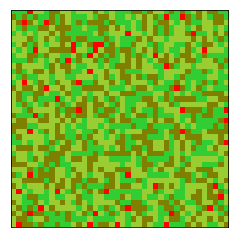

In [156]:
matt,L=generation_matrice(40,0.4,50)
dessin(matt,L)

Retourne la nouvelle position des agents

In [53]:
def carto(chanzon,mat,nbdep):
    
    #i:int
    #j:int
    borne=10
    ha,ga,ba,da=True,True,True,True
    suii=0
    suij=0   
    nbdep=nbdep+1
    for i in range(0,borne+1):
        for j in range(0,borne+1):
            if mat[i,j]==1:
                poshj=j
                poshi=i
            if mat[i,j]==-1:
                pospi=i
                pospj=j
    borpi=2
    borpj=2
    if pospi==borne:
        borpi=1
    if pospj==borne:
        borpj=1
    borhi=2
    borhj=2
    if poshi==borne:
        borhi=1
    if poshj==borne:
        borhj=1
    if chanzon == True:
        a=0
        while a==0:
            n=(np.random.random_sample()*8)//2
            if n>=2.9 and n<=3.1 and poshj!=0:
                if mat[poshi,poshj-1]<2:
                    mat[poshi,poshj]=nbdep
                    mat[poshi,poshj-1]=1
                    a=1
            elif n>=1.9 and n<=2.1 and poshi!=borne :
                if mat[poshi+1,poshj]<2:
                    mat[poshi,poshj]=nbdep
                    mat[poshi+1,poshj]=1
                    a=1
            elif n>=0.9 and n<=1.1 and poshj!=borne:
                if mat[poshi,poshj+1]<2:
                    mat[poshi,poshj]=nbdep
                    mat[poshi,poshj+1]=1
                    a=1
            elif n>=-0.1 and n<=0.1 and poshi!=0:
                if mat[poshi-1,poshj]<2:
                    mat[poshi,poshj]=nbdep
                    mat[poshi-1,poshj]=1
                    a=1
            
            if poshi!=0:
                if mat[poshi-1,poshj]>0 or mat[poshi-1,poshj]==-3:
                    ha=False
            else:
                ha=False
            if poshj!=0:
                if mat[poshi,poshj-1]>0 or mat[poshi,poshj-1]==-3:
                    ga=False
            else:
                ga=False
            if poshj!=borne:
                if mat[poshi,poshj+1]>0 or mat[poshi,poshj+1]==-3:
                    da=False
            else:
                da=False
            if poshi!=borne:
                if mat[poshi+1,poshj]>0 or mat[poshi+1,poshj]==-3:
                    ba=False
            else:
                ba=False
                
            if ba==False and ha==False and da==False and ga==False:
                suivi=10000
                for i in range(poshi-1,poshi+borhi):
                    for j in range(poshj-1,poshj+borhj):
                        if mat[i,j]<suivi and i>=0 and i<=borne and j<=borne and j>=0 and mat[i,j]!=1:
                            suivi=mat[i,j]
                            suii=i
                            suij=j
                mat[poshi,poshj]=nbdep
                mat[suii,suij]=1
                a=1
    
    


        suivi=0
        traque=False
        combat=False
        
        for i in range(pospi-1,pospi+borpi):
            for j in range(pospj-1,pospj+borpj):
                if mat[i,j]!=0 and mat[i,j]!=-1 :
                    print(i,j)
                    if i>=0 and i<=borne and j<=borne and j>=0:
                        traque=True
                        if mat[i,j]==1:
                            combat= True
                        elif mat[i,j]>suivi:
                            suivi=mat[i,j]
                            suii=i
                            suij=j
                            visite=True
                if mat[i,j]==1 and i>=0 and i<=borne and j<=borne and j>=0:
                    combat= True
                    mat[i,j]=100000
        if traque==True and combat==False:
            if visite==True:
                mat[pospi,pospj]=-3
            else:
                mat[pospi,pospj]=0
            pospi=suii
            pospj=suij
            mat[pospi,pospj]=-1
        if traque==False and combat==False:
            a=0
            while a==0:
                n=(np.random.random_sample()*8)//2
                if n>=3 and pospj!=0 :

                    mat[pospi,pospj]=0
                    mat[pospi,pospj-1]=-1
                    a=1
                elif n>=2 and pospi!=borne :

                    mat[pospi,pospj]=0
                    mat[pospi+1,pospj]=-1
                    a=1
                elif n>=1 and pospj!=borne:

                    mat[pospi,pospj]=0
                    mat[pospi,pospj+1]=-1
                    a=1
                elif n>=0 and pospi!=0 :

                    mat[pospi,pospj]=0
                    mat[pospi-1,pospj]=-1
                    a=1
        for i in range (0,borne+1):
            for j in range(0,borne+1):
                if mat[i,j]>1 and mat[i,j]<nbdep-15:
                    mat[i,j]=-3
    dessin(mat)
    return mat
        

In [54]:
a=np.zeros((11,11))

a[3,7]=-1
a[6,6]=25
a[5,6]=24
a[4,6]=23
a[4,5]=22
a[7,6]=26
a[7,7]=27
a[7,8]=28
a[7,9]=1
print(a)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 22. 23.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 24.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 25.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 26. 27. 28.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [55]:
carto(True, matrice1,34)

NameError: name 'matrice1' is not defined

4 6
<matplotlib.colors.ListedColormap object at 0x0000022B48DF2DD8> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2] <matplotlib.colors.BoundaryNorm object at 0x0000022B48DF2D30>


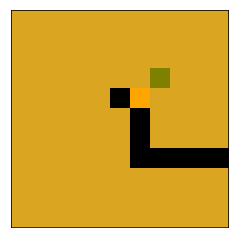

3 7
4 5
5 6
<matplotlib.colors.ListedColormap object at 0x0000022B48FFFEF0> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2] <matplotlib.colors.BoundaryNorm object at 0x0000022B48CEC6A0>


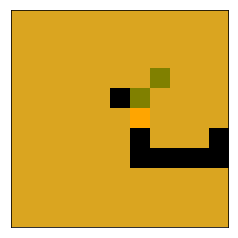

4 5
4 6
6 6
<matplotlib.colors.ListedColormap object at 0x0000022B49679400> [-10, -6, -5, -4, -3, -2, -1, 0, 1, 2] <matplotlib.colors.BoundaryNorm object at 0x0000022B496791D0>


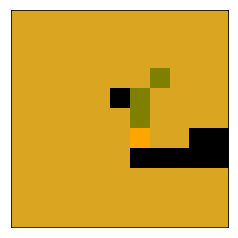

In [56]:
b=0
c=0
while b<3:
    b=b+1
    a=carto(True,a,b)
    if c==1:
        time.sleep(1)

# Simulations

Boucle principale, retourne le nombre de jours survécus par l'agent

In [57]:


def simulation_survie(agent,biome):
    """str*str*dict[str:tuple[float,float]]*dict[str:tuple[float,float,int,float,float,float]]"""
    
    #c : cause de la fin
    c = ""
    #j : compteur jour
    j = 0
    #jour_r:float
    jour_r=-10
    #abri:bool
    abri=False
    #sauve:bool
    sauve=False
    #sourceinf:bool
    source_inf=False
    #sante:float
    sante=1.0
    #hydrat:float
    hydrat=1.0
    #alimentation:float
    alimentation=1.0
    #Lsante:list[float]
    Lsante=[]
    Leau=[]
    
    force , capadap = dictionnaire_humain[agent]
    p_a , p_ap , veg , p_e , p_v , p_s = dictionnaire_biome[biome]
    vegr=veg
    p_s_ini = p_s
    p_s_10=p_s
    while sante > 0 and sauve != True:
        jour_r , abri , sauve , source_inf = construction_abri(capadap , source_inf , vegr , veg , p_v , jour_r , abri)
        
        sourceinf , hydrat ,b = trouver_eau(p_e , capadap , source_inf , hydrat)
        
        alimentation , sante , c  = inter_anim(p_a, p_ap, force, capadap, alimentation, sante, c)
        
        if c != "":
            print(model(j,Lsante),Lsante)
            return j, c,sante
        
        alimentation , vegr = inter_veget(veg,alimentation,capadap,vegr)
        
        sante , alimentation , hydrat , force , c = sante_fct_hydr_alim(alimentation, hydrat, sante,abri,force,c)
        
        sauve , p_s = secouru (p_s,j,p_s_ini,p_s_10)
        
        alimentation_p,hydrat_p = nourriture_p(p_a, alimentation_p, p_e, hydrat_p)
        
        alimentation_p, hydrat_p = ev_nourriture_p(alimentation_p, hydrat_p)
        
        sante_fct_hydr_alim_p(alimentation_p, hydrat_p, sante_p)
        
        res = combat_p_h(force,cap,dang_p,sante)
        
        sante_p = alimentation, sante, alimentation_p, sante_p , c = sante_apres_combat(res,alimentation,sante,alimentation_p,sante_p)
        
        
        Lsante.append(sante)
        Leau.append(hydrat)
        #Définition de la capacité de survie a x jour
        
        if j==10:
            p_s_10 = p_s
        
        #Augmentation de la capacité d'adaptation
        if capadap<1.0:
            capadap=capadap+0.01
       
        
        j=j+1
    print(model(j,Lsante),Lsante)
    if sauve==True:
        c="Sauvé!"
    return j, c,sante




In [58]:
def test(a,b,c):
    comp=0
    while a!=0:
        aa,ab,ah=simulation_survie(b,c)
        if ah!=0:
            comp=comp+1
        a=a-1
    return simulation_survie(b,c),comp

In [59]:
test(30,"professionnel","Amazonie")

ValueError: not enough values to unpack (expected 3, got 2)